# En este notebook resolveré las problemáticas planteadas en el Finger Exercise 1 de la materia 75.06 - Organización de Datos.

El objetivo de este ejercicio es realizar un muy rápido análisis del set de datos del TP. Es una buena oportunidad para instalar las herramientas que van a usar para la primera entrega del TP que consiste en realizar un análisis exploratorio y visualizaciones. 

Herramientas recomendadas:

Python con Pandas, Matplotlib y otros.
R y R-Studio con Ggplot2 y otros.

Para realizar el finger, deberán bajar el set de datos del TP:

https://drive.google.com/file/d/1gUddcLLujjFfwZslypUv1LESTM6KiwJn/view?usp=sharing


Se pide:

- Analizar cuál es el tipo de evento predominante en el set de datos. 
- Calcular cuales son los 5 productos (identificados por sku) con mayor cantidad de conversiones.
- Averiguar cuáles son los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

Para los puntos anteriores, realizar una visualización que permita comunicar los hallazgos en forma clara.


In [46]:
# Se importan las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [40]:
# Leo el dataframe de eventos
eventos = pd.read_csv('Datos/events.csv')

/Users/gastonmontes/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Analizar cuál es el tipo de evento predominante en el set de datos.

In [44]:
# Elimino las columnas que no necesito
eventos1 = eventos[['event']]

# Elimino las filas que no tengan evento.
eventos1.dropna(subset = ['event'], inplace = True)

# Creo una columna con todos 1 que va a servir de contador, luego realizo el groupby y por ultimo el ordenamiento.
# Luego muestro una tabla con el resultado.
eventos1 = eventos[['event']]
eventos1['cantidad'] = 1
eventos1 = eventos1.groupby(['event'], as_index = False).count()
eventos1 = eventos1.sort_values(by = 'cantidad', ascending = False)
eventos1

,event,cantidad
9,viewed product,528931
1,brand listing,98635
10,visited site,87378
0,ad campaign hit,82827
4,generic listing,67534
7,searched products,56073
6,search engine hit,50957
2,checkout,33735
8,staticpage,3598
3,conversion,1172


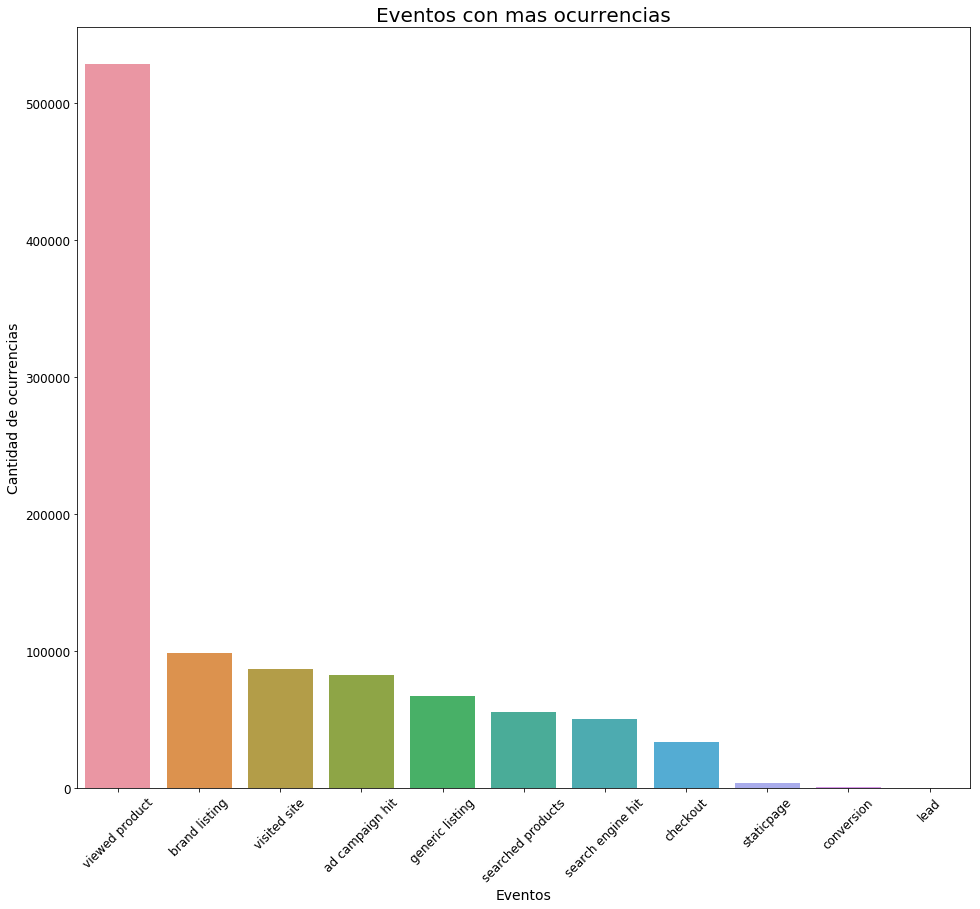

In [53]:
# Creo un gráfico de barra simple que muestre los eventos según su cantidad.
#eventos1['event'].value_counts().plot(kind = 'bar',figsize = (20,10))

plt.subplots(figsize = (16, 14))
eventos1Plot = sns.barplot(x = eventos1['event'], y = eventos1['cantidad'], orient = 'v')
eventos1Plot.set_title("Eventos con mas ocurrencias", fontsize = 20)
eventos1Plot.set_ylabel("Cantidad de ocurrencias", fontsize = 14)
eventos1Plot.set_xlabel("Eventos", fontsize = 14)
eventos1Plot.set_xticklabels(eventos1Plot.get_xticklabels(), rotation = 45)
eventos1Plot.tick_params(labelsize = 12)
plt.savefig('EventoPredominante.jpg')
plt.show()